# 🏠 Ames Housing Price Prediction Project

## 1. Project Introduction

In this project, I aimed to build machine learning models to predict housing prices based on various property features in Ames, Iowa.  
This is a **supervised learning** project, specifically a **regression task**, because the goal is to predict a continuous value (SalePrice).  
The main objective was to analyze how different features contribute to property prices and create a model that can predict home prices accurately.  
This is important because accurate price prediction can help homeowners, real estate agents, and buyers make better-informed decisions.

---

## 2. Dataset Description

The dataset used is the **Ames Housing Dataset**, which is a popular real estate dataset containing information on residential homes in Ames, Iowa, sold between 2006 and 2010.

- **Source:**  
De Cock, D. (2011). *Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project*. Journal of Statistics Education, 19(3).

- **Dataset URL:**  
[https://www.kaggle.com/datasets/prevek18/ames-housing-dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset)


### Data Summary

- **Rows (samples):** 2,930 
- **Columns (features):** 82  
- **Target variable:** `SalePrice`  
- **Byte size:** ~1.1 MB  
- **Data structure:** Single-table dataset (not gathered from multiple sources)  

- **Feature Types:**  
  - **Numerical Features:** `LotArea`, `TotalBsmtSF`, etc.  
  - **Categorical Features:** `Neighborhood`, `HouseStyle`, `RoofMatl`, etc.  
  - **Ordinal Features:** `OverallQual`, `KitchenQual`, etc.  

- **Description of Key Features:**  
  - **SalePrice:** The property's sale price in dollars. This is the target variable you're trying to predict.  
  - **Neighborhood:** Physical locations within Ames city limits  
  - **OverallQual:** Overall material and finish quality  
  - **OverallCond:** Overall condition rating  
  - **YearBuilt:** Original construction date  
  - **GrLivArea:** Above grade (ground) living area in square feet  
  - **Bedroom:** Number of bedrooms above basement level  
  - **Kitchen:** Number of kitchens  

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
df=pd.read_csv(r'C:\Users\shahw\Downloads\archive\AmesHousing.csv')

# Display first 5 rows and columns
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#Summary
print('Statistical Summary')
df.describe()

Statistical Summary


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [4]:
# Dimensions of data
df.shape

(2930, 82)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

The original format of columns is incomptible with statsmodel OLS to cleaning the column names here to make them compatible:

In [6]:
# - Trim leading/trailing whitespace
# - Replace spaces and slashes with underscores
# - Prefix with underscore if the name starts with a digit
def clean_column(col):
    col = col.strip()                   # remove whitespace
    col = re.sub(r'\s+', '_', col)      # replace spaces with _
    col = re.sub(r'[/]', '_', col)      # replace slashes with _
    col = re.sub(r'^\d', '_', col)      # if it starts with a digit, prefix with _
    return col
df.columns=[clean_column(col) for col in df.columns]
df.columns

Index(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod_Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', '_st_Flr_SF',
       '_nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
      

## 3. Data Cleaning

The dataset required cleaning before modeling, and I handled it carefully inside the notebook:

- **Handling Missing Values:**  
  - Dropped columns with more than 50% missing values (e.g., PoolQC, MiscFeature).
  - Imputed missing categorical features with 'None' or mode values (e.g., GarageType).
  - Imputed missing numerical features with the mean or median depending on the distribution (e.g., LotFrontage).

- **Data Type Munging:**  
  - Found that several numerical features are discrete and can be interpreted as categorcial features. So I changed their data type.

- **Histograms:**  
  - Found that several features like SalePrice were right-skewed.
  - Applied a log transformation later to normalize these skewed distributions.

- **Boxplots and Barplots:**  
  - Used boxplots to visualize SalePrice across different categories (e.g., Neighborhood, OverallQual) to spot outliers.
  - Plotted barplots of categorical features against SalePrice to understand how different categories influence the target.
  - This helped identify strong categorical predictors early on.

- **Encoding Categorical Variables:**  
  - Binary features were mapped manually (e.g., Street, Central_Air).
  - Low-cardinality features were one-hot encoded to retain detailed information without creating too many columns.
  - High-cardinality features were mean-encoded to prevent dimensionality explosion while preserving relationship with SalePrice.




Missing Values:

Pool_QC           99.556314
Misc_Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace_Qu      48.532423
Lot_Frontage      16.723549
Garage_Cond        5.426621
Garage_Finish      5.426621
Garage_Yr_Blt      5.426621
Garage_Qual        5.426621
Garage_Type        5.358362
Bsmt_Exposure      2.832765
BsmtFin_Type_2     2.764505
Bsmt_Qual          2.730375
Bsmt_Cond          2.730375
dtype: float64


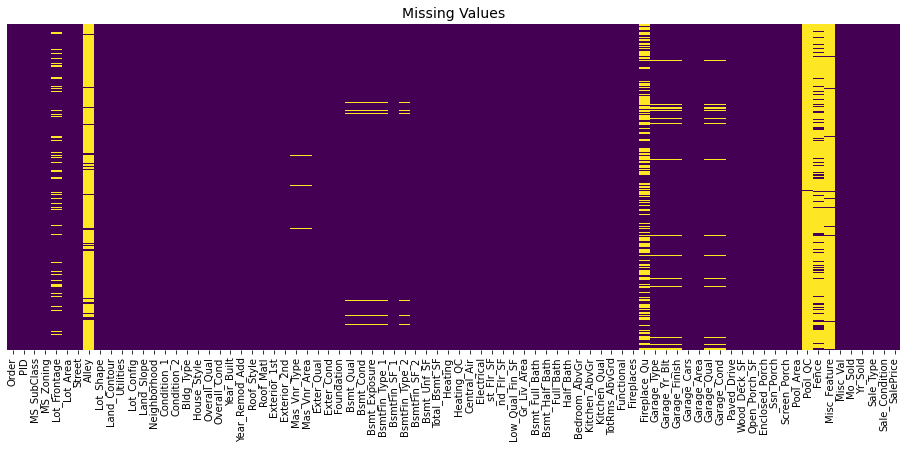

In [7]:
#Percentage of missing values in features
print((df.isnull().sum()*100/len(df)).sort_values(ascending=False).head(15))

#Heatmap for visualization
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Values',fontsize=14)
plt.show()

I dropped columns with over 50% missing values and duplicate rows , as they add noise and little useful information for predictions. Imputing heavily missing data can lead to unreliable results, so I preferred removal. 

In [8]:
# Drop the duplicates if any
df=df.drop_duplicates()

# Drop columns with 50% missing values
df=df.drop(columns=['Order','PID'])
for col in df.columns:
    if df[col].isnull().sum()/len(df)>0.5:
        df=df.drop(columns=[col])

# Drop samples with 30% missing values
for i in df.index:
    if df.loc[i].isnull().sum()/len(df.columns)>0.3:
        df=df.drop(index=i)
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

Fireplace_Qu       48.532423
Lot_Frontage       16.723549
Garage_Cond         5.426621
Garage_Yr_Blt       5.426621
Garage_Finish       5.426621
Garage_Qual         5.426621
Garage_Type         5.358362
Bsmt_Exposure       2.832765
BsmtFin_Type_2      2.764505
BsmtFin_Type_1      2.730375
Bsmt_Cond           2.730375
Bsmt_Qual           2.730375
Mas_Vnr_Area        0.784983
Mas_Vnr_Type        0.784983
Bsmt_Full_Bath      0.068259
Bsmt_Half_Bath      0.068259
Garage_Cars         0.034130
Electrical          0.034130
Total_Bsmt_SF       0.034130
Bsmt_Unf_SF         0.034130
BsmtFin_SF_2        0.034130
BsmtFin_SF_1        0.034130
Garage_Area         0.034130
Paved_Drive         0.000000
Sale_Type           0.000000
Full_Bath           0.000000
Half_Bath           0.000000
Bedroom_AbvGr       0.000000
Kitchen_AbvGr       0.000000
Kitchen_Qual        0.000000
Sale_Condition      0.000000
Yr_Sold             0.000000
Mo_Sold             0.000000
Misc_Val            0.000000
TotRms_AbvGrd 

Some features like `Fireplaces` and `LotFrontage` still had a noticeable amount of missing values. Instead of dropping them, I filled them using group-wise statistics (e.g., based on neighborhood or building type) to make the imputation smarter.  
For the rest of the missing values, I used overall (global) median or mode values to keep things simple and consistent across the dataset.

In [9]:
# since lot frontage and firelaces qu have high number of missing values ill be imputing it using groupby
# For Fireplaces_Qu I'm using Fireplaces — the number of fireplaces indicates whether quality should exist or not.

df['Fireplace_Qu'] = df.groupby('Fireplaces')['Fireplace_Qu'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


# For lot frontage I'm using Neighborhood — it's highly related to location and likely affects lot sizes.
df['Lot_Frontage'] = df.groupby('Neighborhood')['Lot_Frontage'].transform(lambda x: x.fillna(x.median()))

In [10]:
# Separating Numerical and Categorical Features so I can handle them separately.

categorical_features=df.select_dtypes(include=['object']).columns.to_list()
numerical_features=df.select_dtypes(include=['int64','float64']).columns.to_list()

for feature in categorical_features:
    df[feature]=df[feature].fillna(df[feature].mode()[0])
for feature in numerical_features:
    df[feature]=df[feature].fillna(df[feature].median())

In [11]:
# To check if the data is clean.
df.isnull().sum()

MS_SubClass        0
MS_Zoning          0
Lot_Frontage       0
Lot_Area           0
Street             0
Lot_Shape          0
Land_Contour       0
Utilities          0
Lot_Config         0
Land_Slope         0
Neighborhood       0
Condition_1        0
Condition_2        0
Bldg_Type          0
House_Style        0
Overall_Qual       0
Overall_Cond       0
Year_Built         0
Year_Remod_Add     0
Roof_Style         0
Roof_Matl          0
Exterior_1st       0
Exterior_2nd       0
Mas_Vnr_Type       0
Mas_Vnr_Area       0
Exter_Qual         0
Exter_Cond         0
Foundation         0
Bsmt_Qual          0
Bsmt_Cond          0
Bsmt_Exposure      0
BsmtFin_Type_1     0
BsmtFin_SF_1       0
BsmtFin_Type_2     0
BsmtFin_SF_2       0
Bsmt_Unf_SF        0
Total_Bsmt_SF      0
Heating            0
Heating_QC         0
Central_Air        0
Electrical         0
_st_Flr_SF         0
_nd_Flr_SF         0
Low_Qual_Fin_SF    0
Gr_Liv_Area        0
Bsmt_Full_Bath     0
Bsmt_Half_Bath     0
Full_Bath    

In [12]:
# Changing the data type of some discrete numrical variables. I will handle the rest in Feature Engineering.
c=[cols for cols in numerical_features if len(df[cols].value_counts())<=17]
discrete_num=['MS_SubClass','Overall_Cond','Bedroom_AbvGr','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Pool_Area','Mo_Sold']

for col in discrete_num:
    df[col] = df[col].astype('object')

categorical_features=df.select_dtypes(include=['object']).columns.to_list()
numerical_features=df.select_dtypes(include=['int64','float64']).columns.to_list()


I'm plotting bar charts for the numerical features to get a sense of their distributions. If any of them look really skewed, I’m applying transformations to make them more normally distributed.

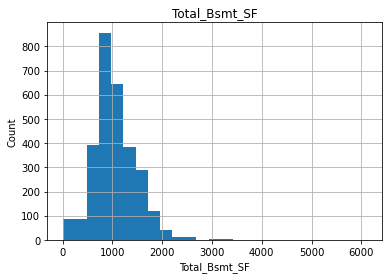

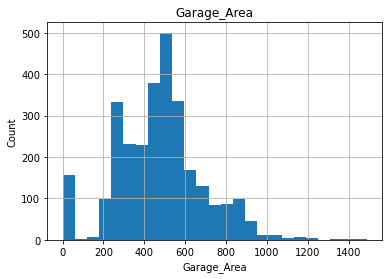

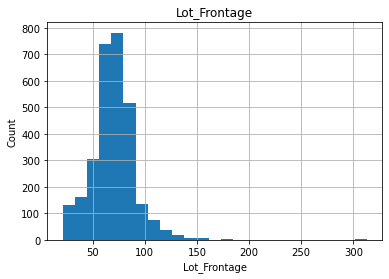

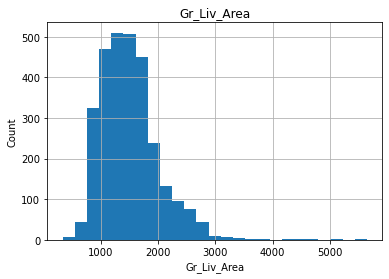

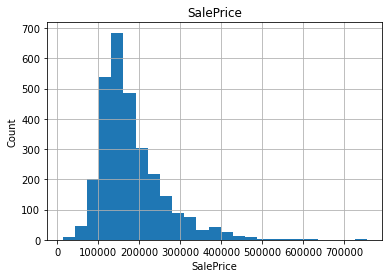

In [13]:

num=['Total_Bsmt_SF','Garage_Area','Lot_Frontage','Gr_Liv_Area','SalePrice']
cat=['Neighborhood','Overall_Qual','House_Style']

for col in num:
    df[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

# Adjust the skew threshold as needed
for col in numerical_features:
    if df[col].skew() > 0.5:
        df[col] = np.log1p(df[col])

    

This is to visualize the outliers but since I'll be using random forest that is robust to outliers, I will not be treating them.

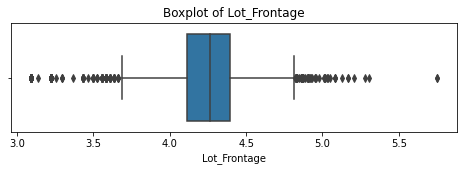

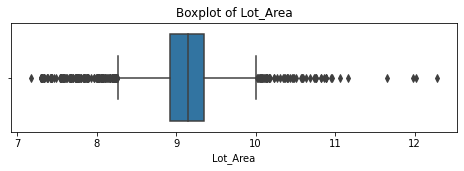

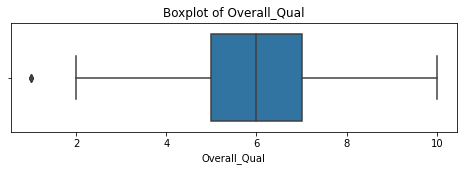

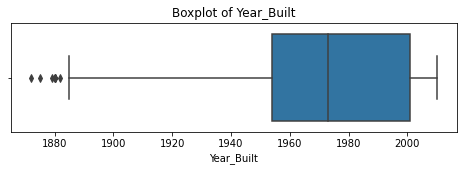

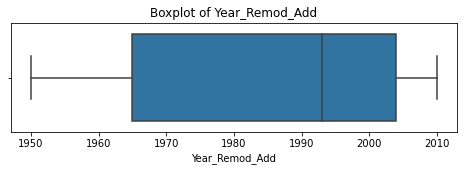

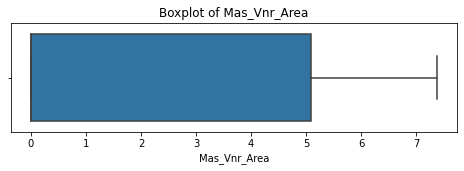

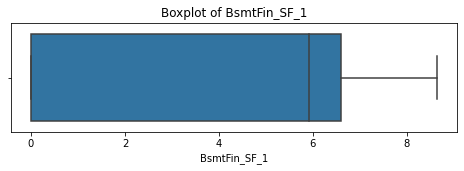

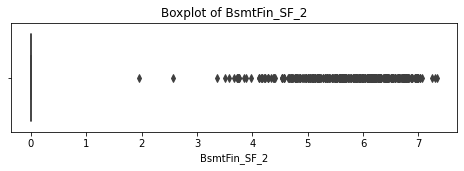

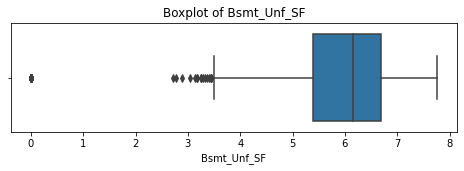

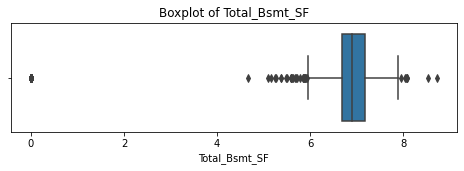

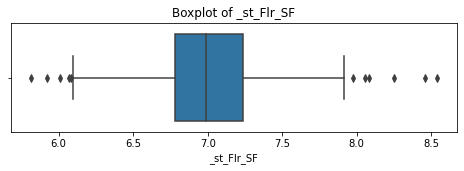

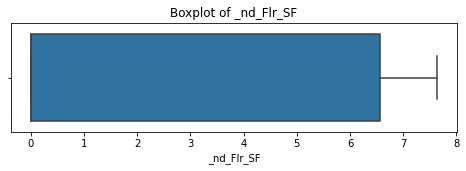

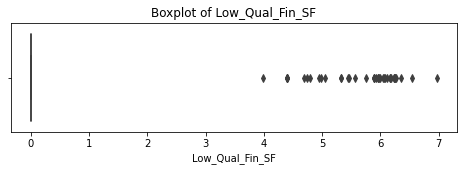

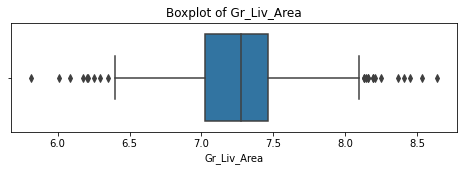

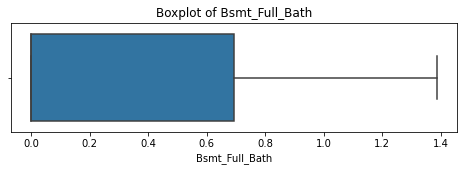

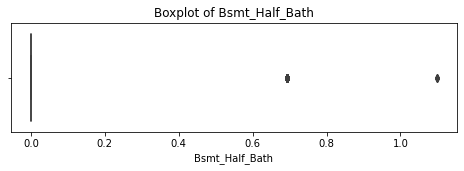

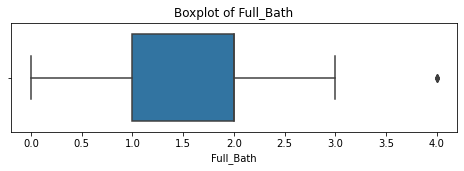

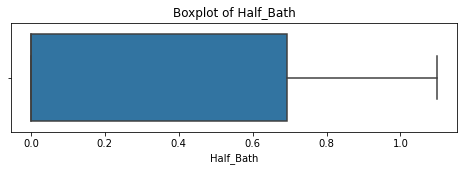

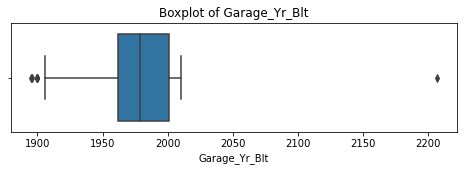

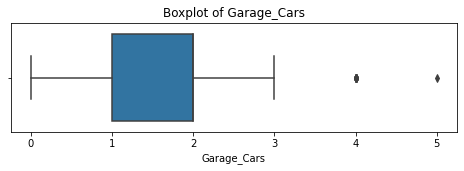

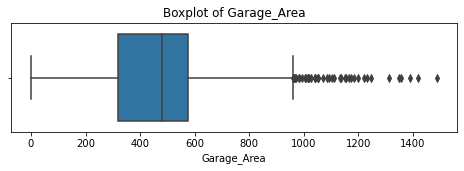

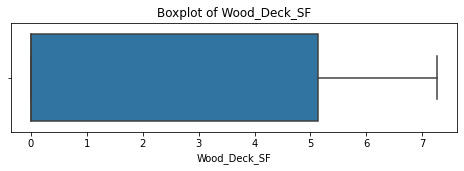

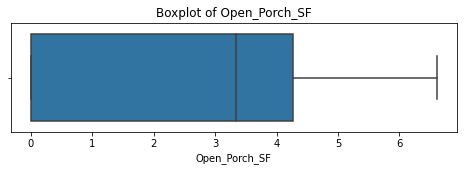

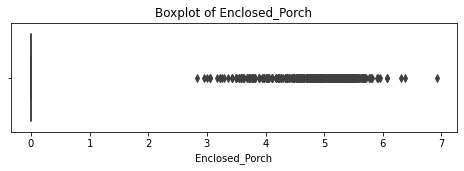

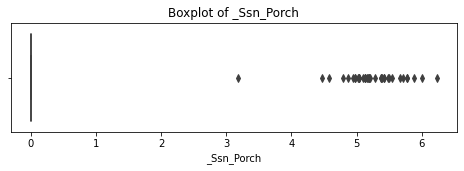

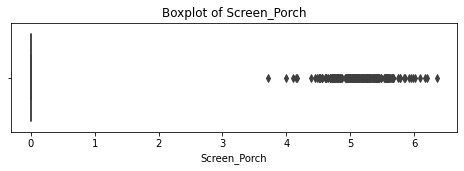

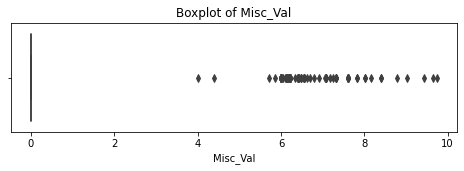

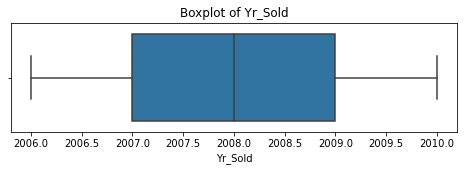

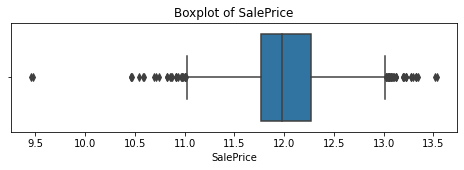

In [14]:
for col in numerical_features:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



Now I’m moving on to handling the categorical features. Since this is a regression task, I need to convert them into numerical format so they can actually be useful to the model

I'm checking how many unique categories each categorical feature has, and plotting them to get a better sense of their cardinality. That’ll help me decide what kind of encoding makes the most sense — like one-hot for low cardinality and something else for the higher ones.

In [15]:
# Check no.of unique values.
for cat in categorical_features:
    print(f'{cat} has {len(df[cat].value_counts())} unqiue values')

MS_SubClass has 16 unqiue values
MS_Zoning has 7 unqiue values
Street has 2 unqiue values
Lot_Shape has 4 unqiue values
Land_Contour has 4 unqiue values
Utilities has 3 unqiue values
Lot_Config has 5 unqiue values
Land_Slope has 3 unqiue values
Neighborhood has 28 unqiue values
Condition_1 has 9 unqiue values
Condition_2 has 8 unqiue values
Bldg_Type has 5 unqiue values
House_Style has 8 unqiue values
Overall_Cond has 9 unqiue values
Roof_Style has 6 unqiue values
Roof_Matl has 8 unqiue values
Exterior_1st has 16 unqiue values
Exterior_2nd has 17 unqiue values
Mas_Vnr_Type has 5 unqiue values
Exter_Qual has 4 unqiue values
Exter_Cond has 5 unqiue values
Foundation has 6 unqiue values
Bsmt_Qual has 5 unqiue values
Bsmt_Cond has 5 unqiue values
Bsmt_Exposure has 4 unqiue values
BsmtFin_Type_1 has 6 unqiue values
BsmtFin_Type_2 has 6 unqiue values
Heating has 6 unqiue values
Heating_QC has 5 unqiue values
Central_Air has 2 unqiue values
Electrical has 5 unqiue values
Bedroom_AbvGr has 8 u

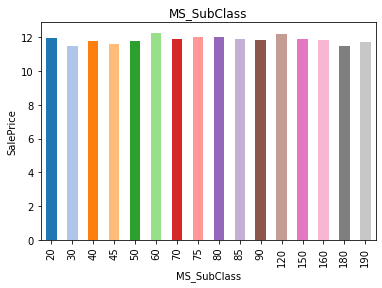

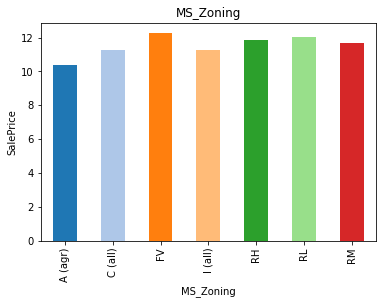

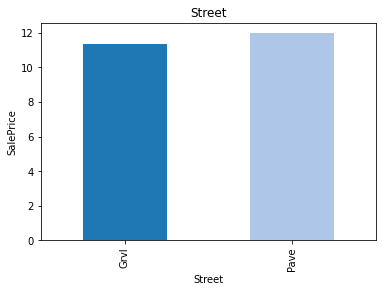

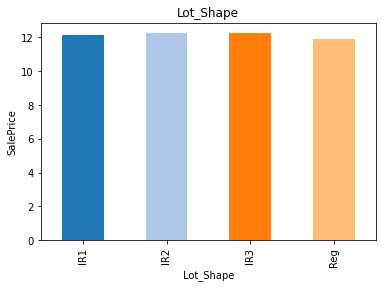

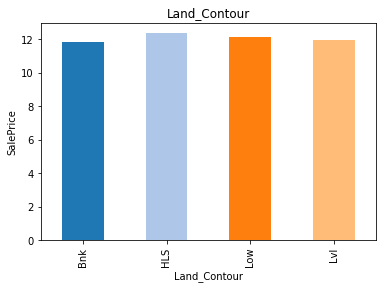

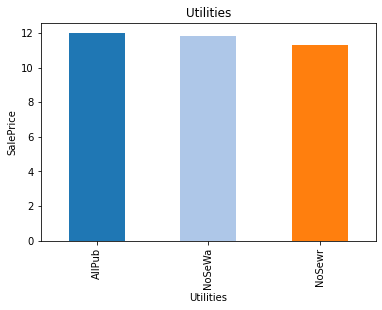

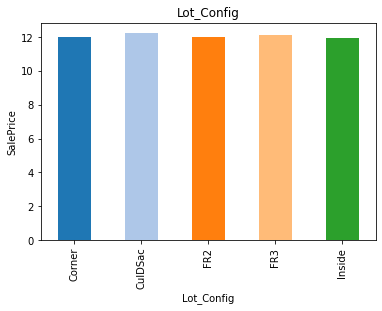

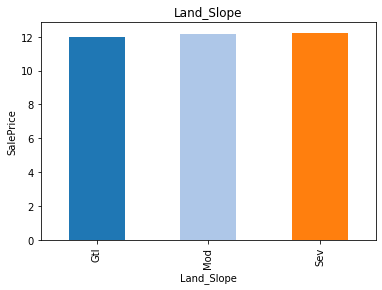

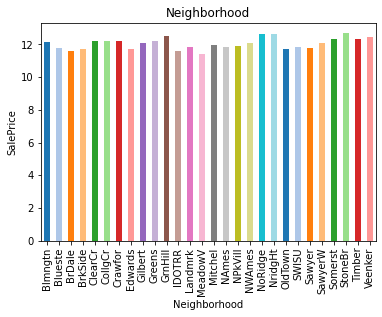

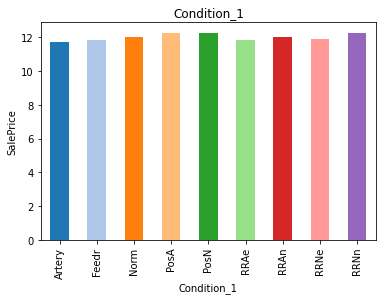

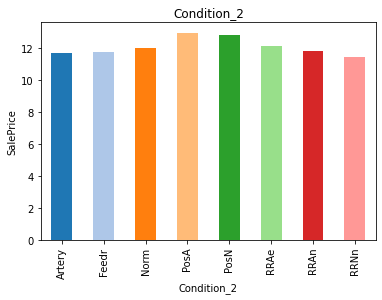

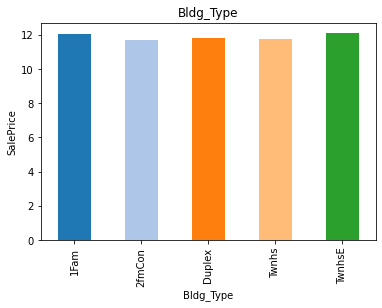

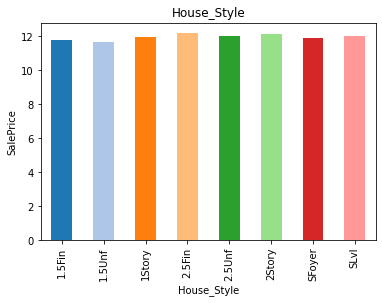

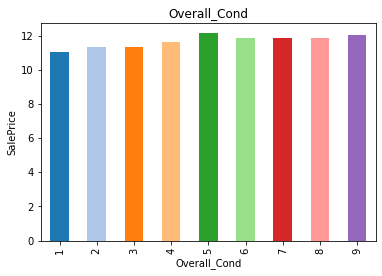

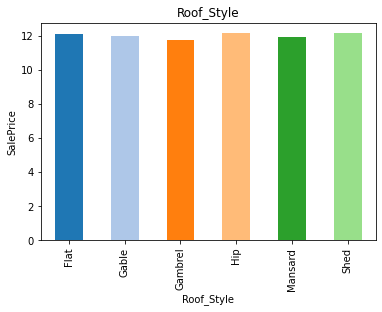

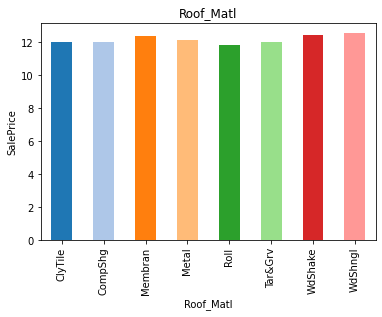

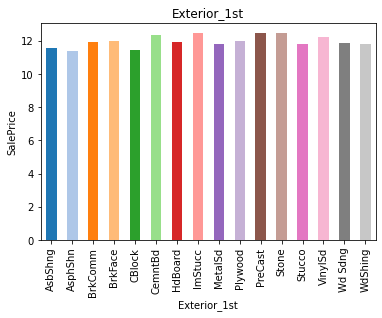

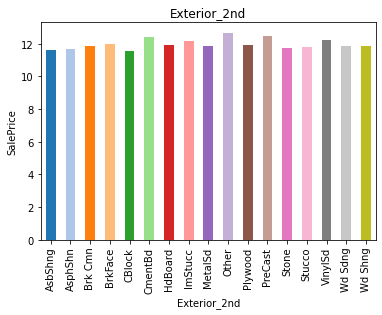

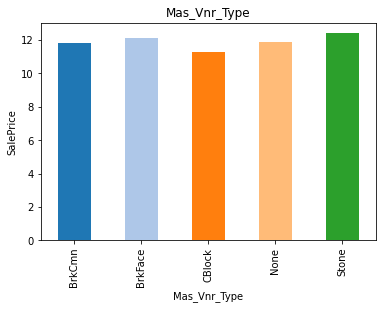

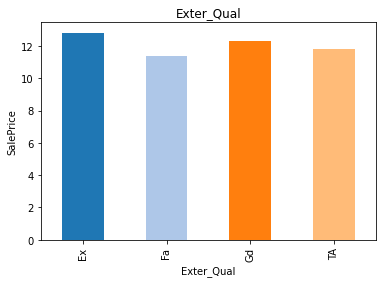

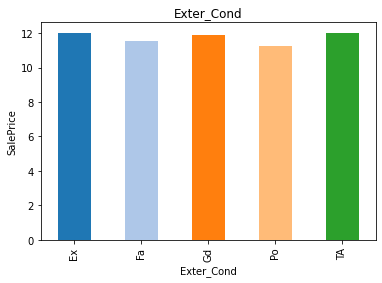

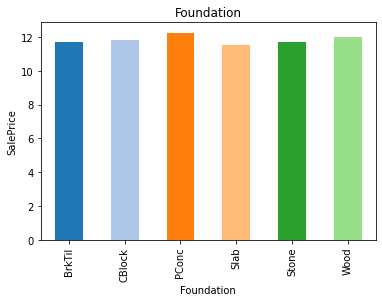

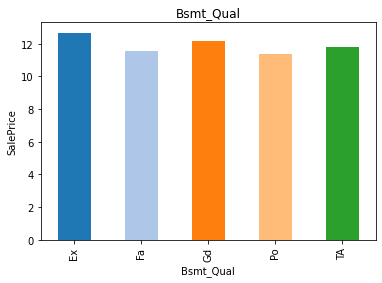

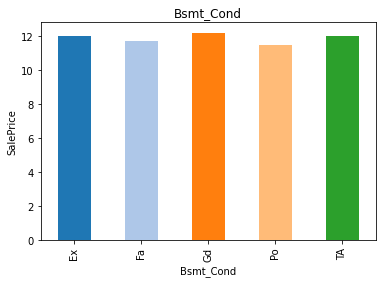

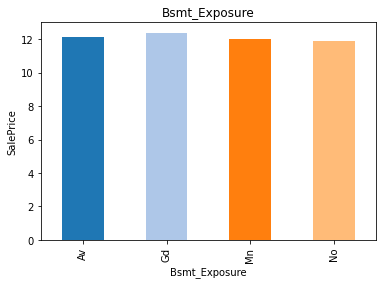

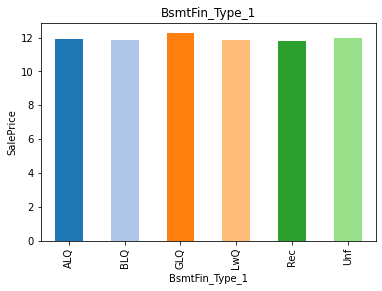

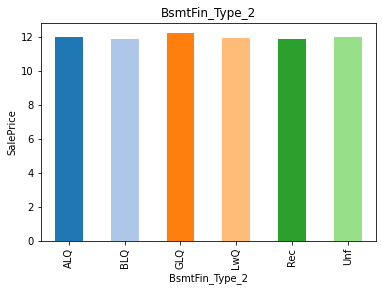

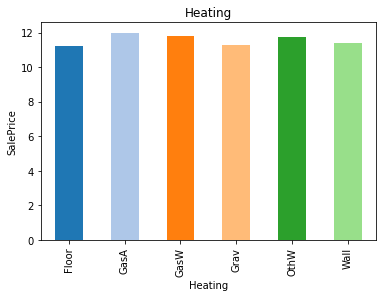

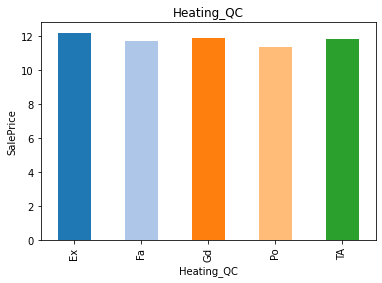

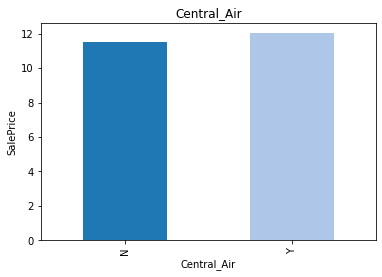

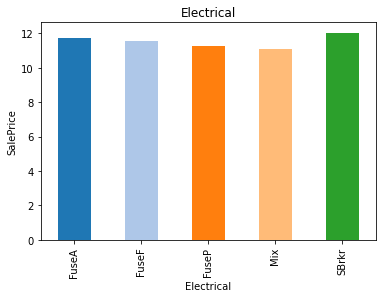

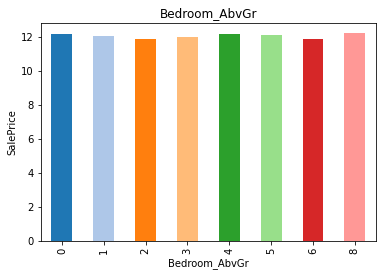

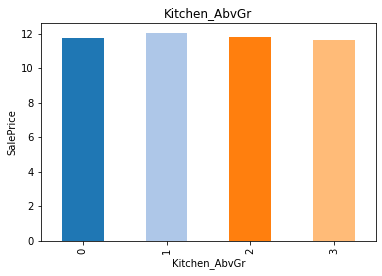

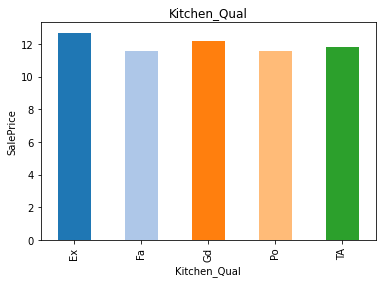

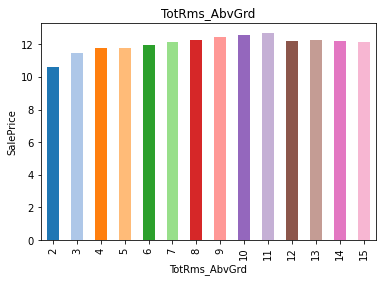

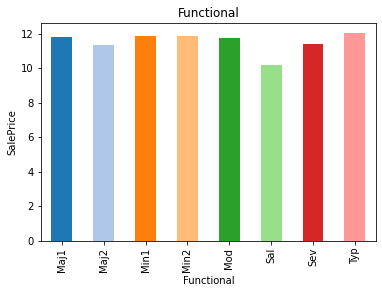

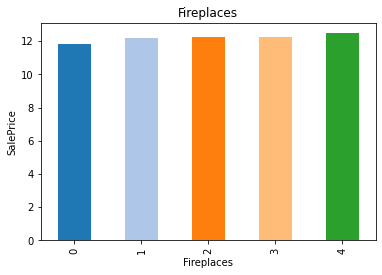

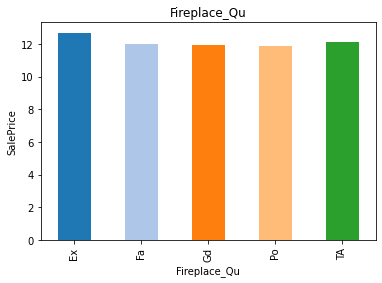

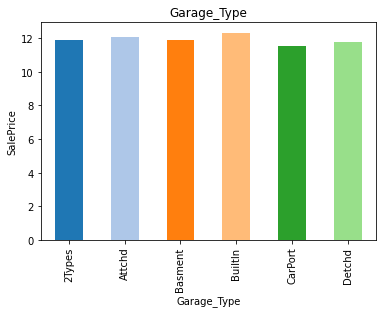

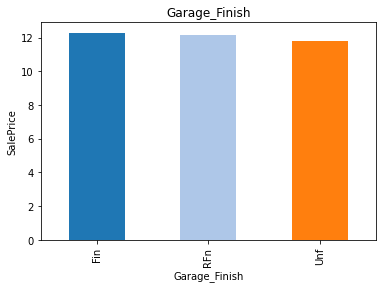

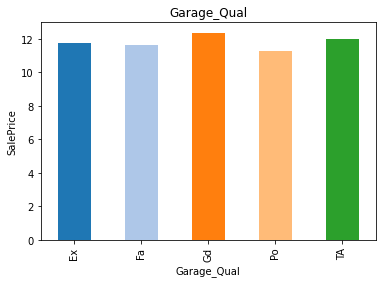

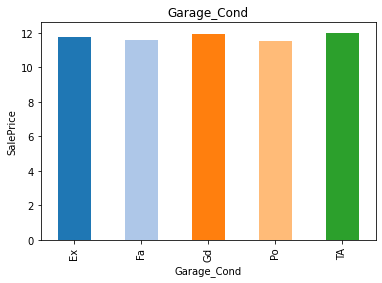

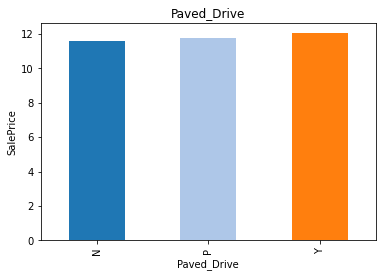

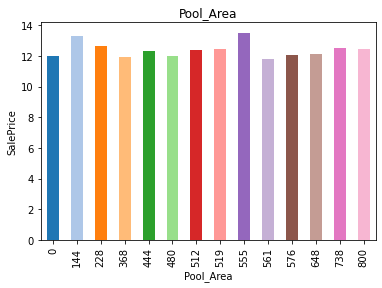

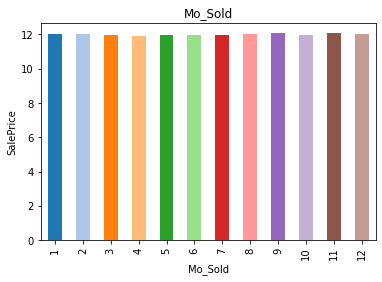

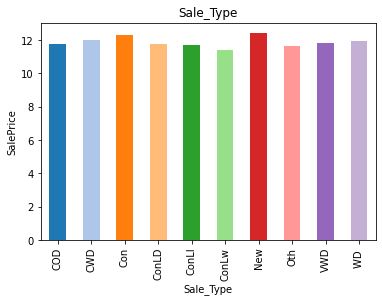

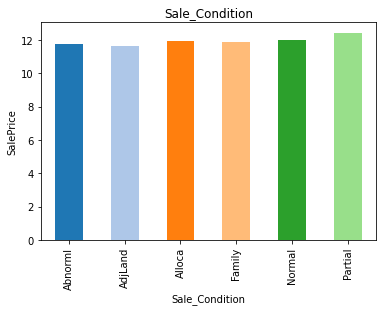

In [16]:
#Visualization of target features distribution through the unique value for different features.
for col in categorical_features:
    df.groupby(col)['SalePrice'].median().plot.bar(color=plt.cm.tab20.colors)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()
    

Encoding Strategy :

Binary Encoding (0/1): Simple and interpretable for columns like Street (paved vs unpaved).

One-Hot Encoding: Used for features with 3-10 categories to preserve information without exploding feature space.

Mean Encoding: Applied to features with more than 10 categories to avoid dimensionality explosion, while capturing the relationship between each category and the target (SalePrice)

In [17]:
category_counts={}
for col in categorical_features:
    category_counts[col]=len(df[col].value_counts())


In [18]:
category_counts={}
for col in categorical_features:
    category_counts[col]=len(df[col].value_counts())

# 1. Map Binary Columns (2 categories) to 0/1    
binary_cols = ['Street', 'Central_Air']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({x.unique()[0]: 0, x.unique()[1]: 1}))

# 2. One-Hot Encode Low Cardinality Features (3 to 10 unique categories)
low_cardinality = [col for col, n in category_counts.items() if 2 < n <= 10]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

# 3. Mean Encoding for High Cardinality Features (>10 unique categories)
high_cardinality = [col for col, n in category_counts.items() if n > 10]
for col in high_cardinality:
    mean_map = df.groupby(col)['SalePrice'].mean()
    df[col] = df[col].map(mean_map)

C:\Users\shahw\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


### Visualizations:

- Missing values were visualized using heatmap.
- Outliers were spotted using  boxplots with SalePrice.
- I analyzed the distribution skewness using histogram.
- Used barplots to look at how different categories were related to `SalePrice`, which gave some good insights.

###  Data Cleaning Summary:

- I filled in missing values carefully based on what type of data it was — like using the median for numbers and mode or "None" for categories.
- I checked for skewness and applied log transformations where needed to make the data behave better.
- Using the insights gained with barplots of categorical features with SalePrice I encoded them based on their size — simple ones got one-hot encoded, and bigger ones were mean encoded to avoid creating too many new columns.
- Changed data types of discrete numerical varaibles to categorical.
- Encoded categorical data so that it is compatible with regression models.

## 4. Exploratory Data Analysis (EDA)

EDA was conducted to better understand feature relationships.

### Key Analyses and Visualizations:

- **Correlation Matrix:**  
  Found strong positive correlations between SalePrice and variables like OverallQual, GrLivArea, and TotalBsmtSF.

- **Barplots:**  
  Visualized strong positive correlations between SalePrice and different categories ranking wise.

- **Pair Plot:**  
  Checked collinearity between features with high correlation to SalePrice.

Correlation map and heatmap to see what features are highly correlated with the target

In [19]:
df[numerical_features].corr()

,Lot_Frontage,Lot_Area,Overall_Qual,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,_st_Flr_SF,_nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_Ssn_Porch,Screen_Porch,Misc_Val,Yr_Sold,SalePrice
Lot_Frontage,1.000000,0.713082,0.172784,0.085281,0.066988,0.163699,0.055312,0.049010,0.062599,0.085740,0.448433,-0.096717,-0.018835,0.317655,0.088975,-0.005644,0.157856,0.008034,0.046219,0.282733,0.329074,0.076315,0.121127,-0.017057,0.018035,0.079697,0.045328,-0.005445,0.339440
Lot_Area,0.713082,1.000000,0.145152,0.033634,0.043330,0.100297,0.064143,0.068078,0.034371,0.085851,0.474805,-0.061638,-0.013643,0.366689,0.107283,0.013575,0.174787,0.034510,0.009408,0.276921,0.326322,0.110947,0.121464,0.014802,0.022794,0.085731,0.087708,-0.028361,0.368499
Overall_Qual,0.172784,0.145152,1.000000,0.597027,0.569609,0.420487,0.111012,-0.079033,0.244057,0.352650,0.465008,0.143717,-0.050854,0.594534,0.171802,-0.042802,0.522263,0.275242,0.541091,0.599392,0.563436,0.309888,0.450948,-0.192134,0.017448,0.034748,-0.070216,-0.020719,0.825645
Year_Built,0.085281,0.033634,0.597027,1.000000,0.612095,0.393378,0.180860,-0.051988,0.071393,0.210695,0.308930,-0.086553,-0.148659,0.272659,0.216137,-0.031892,0.469406,0.274013,0.788297,0.537033,0.479903,0.315859,0.401856,-0.469377,0.013371,-0.048140,-0.062203,-0.013197,0.615485
Year_Remod_Add,0.066988,0.043330,0.569609,0.612095,1.000000,0.225811,0.023781,-0.093373,0.156628,0.202545,0.234795,0.087622,-0.054169,0.341705,0.137044,-0.046777,0.457266,0.217200,0.626320,0.425434,0.376414,0.296133,0.402688,-0.264206,0.043963,-0.049114,-0.047241,0.032652,0.586153
Mas_Vnr_Area,0.163699,0.100297,0.420487,0.393378,0.225811,1.000000,0.215740,-0.024172,0.074315,0.196592,0.362190,-0.049748,-0.092388,0.316177,0.157932,0.044657,0.268574,0.135214,0.297088,0.381381,0.367106,0.174333,0.222314,-0.189250,0.029196,0.058668,-0.035599,-0.008360,0.434237
BsmtFin_SF_1,0.055312,0.064143,0.111012,0.180860,0.023781,0.215740,1.000000,0.184827,-0.247470,0.303318,0.201263,-0.196102,-0.073290,0.001794,0.599903,0.115609,-0.065432,-0.018876,0.072389,0.107561,0.147434,0.130954,0.023374,-0.126394,0.055918,0.088184,0.038051,0.034526,0.243924
BsmtFin_SF_2,0.049010,0.068078,-0.079033,-0.051988,-0.093373,-0.024172,0.184827,1.000000,-0.292476,0.075887,0.063796,-0.126161,-0.012692,-0.062863,0.166035,0.130957,-0.103684,-0.060214,-0.094092,-0.044658,-0.013508,0.046790,-0.062826,0.025889,-0.005892,0.060445,0.032217,0.020045,-0.019378
Bsmt_Unf_SF,0.062599,0.034371,0.244057,0.071393,0.156628,0.074315,-0.247470,-0.292476,1.000000,0.527817,0.123684,0.094658,0.012383,0.207465,-0.229277,-0.083495,0.181455,0.059831,0.113763,0.122317,0.100086,0.010112,0.163930,-0.005403,-0.001999,-0.024180,-0.046066,-0.012166,0.185083
Total_Bsmt_SF,0.085740,0.085851,0.352650,0.210695,0.202545,0.196592,0.303318,0.075887,0.527817,1.000000,0.266483,-0.055519,-0.026238,0.197884,0.224799,0.038825,0.111291,0.050862,0.177131,0.214830,0.227481,0.160931,0.187461,-0.071625,0.013128,0.036088,-0.034625,-0.010997,0.378462


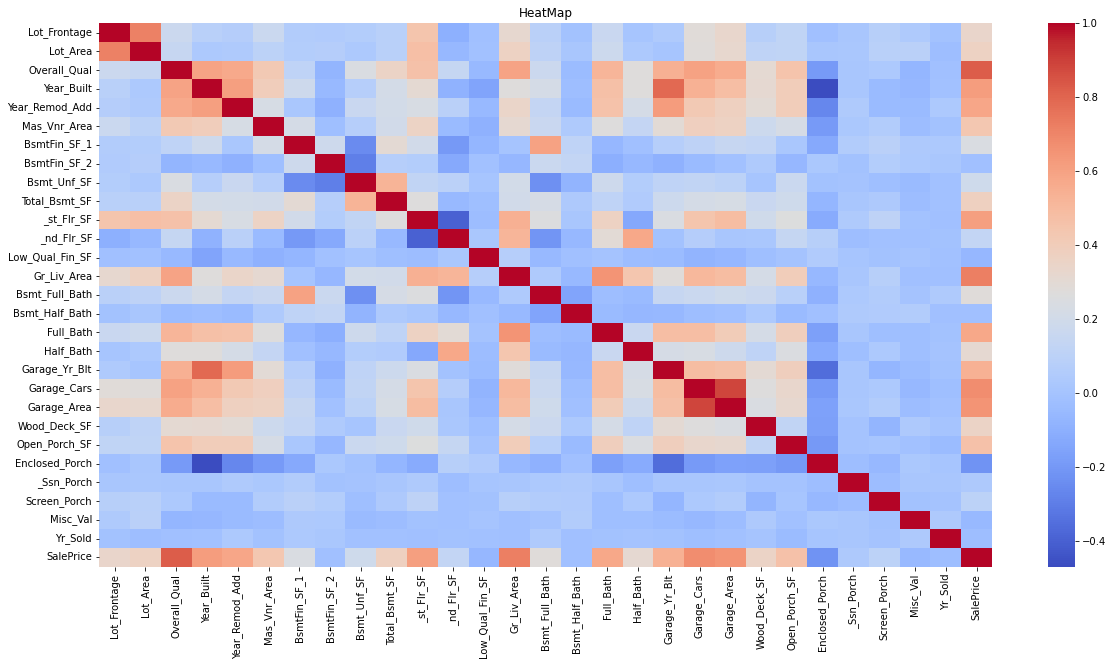

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numerical_features].corr(),cmap='coolwarm',annot=False)
plt.title('HeatMap')
plt.show()

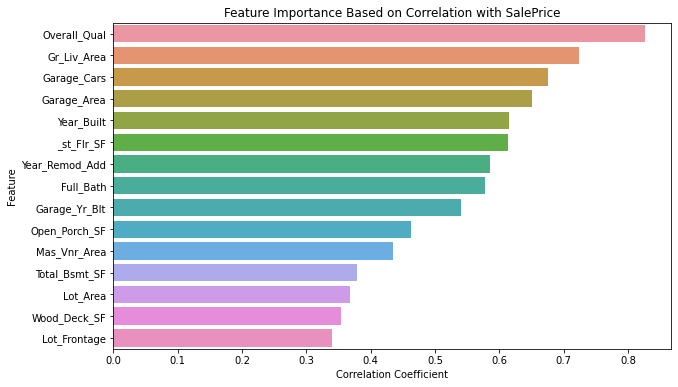

In [21]:
corr_matrix = df[numerical_features].corr()
importances = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(15)

#Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance Based on Correlation with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

### Correlation Analysis:

We analyzed the correlation between features and `SalePrice`.  
Key observations:

#### Moderate Positive Correlations

- **Garage_Cars** and **Garage_Area**: More/larger garages lead to higher prices.
- **Total_Bsmt_SF** and **1st_Flr_SF**: Bigger basements and first floors add value.

#### Weak Positive Correlations

- **Lot_Frontage** and **Lot_Area**: Larger lots slightly increase prices.
- **Year_Built** and **Year_Remod_Add**: Newer or renovated houses sell for more.

#### Weak or Negligible Correlations

- **Bedrooms_AbvGr**, **Kitchen_AbvGr**, **Half_Bath**: Little to no impact on price individually.

#### Negative Correlations

- **MS_SubClass**: Certain house types/styles are associated with lower prices.
    
#### Conclusions:

Focus on **Overall_Qual**, **Gr_Liv_Area**, **Garage** features, and **Basement area** for price prediction.  
Lot size and age have secondary importance.  
Features with weak correlations may still be useful in combination with others.

Pairplot too visualize collinearity between highly correlated features.

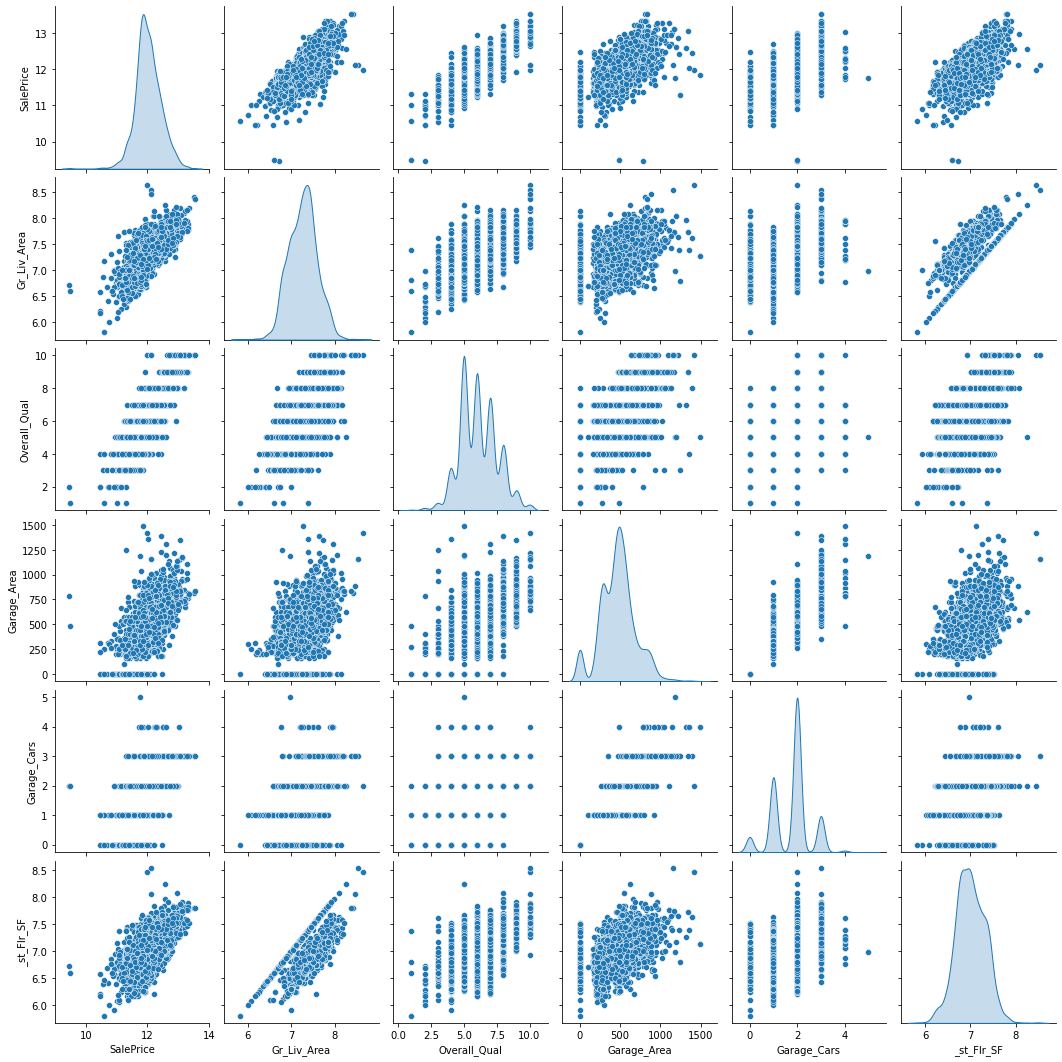

In [22]:

sns.pairplot(df[['SalePrice', 'Gr_Liv_Area', 'Overall_Qual', 'Garage_Area','Garage_Cars','_st_Flr_SF']],diag_kind='kde')
plt.show()


### Pairplot Analysis:

#### Correlation with Target (`SalePrice`)
- **Gr_Liv_Area**: Strong positive linear relationship; larger living areas have higher sale prices.
- **Overall_Qual**: Clear step-wise positive trend; better quality means higher price.
- **1st_Flr_SF**: Positive trend, similar to Gr_Liv_Area.
- **Garage_Area** and **Garage_Cars**: Positive but weaker relationships.

#### Inter-feature Collinearity
- **Gr_Liv_Area** and **1st_Flr_SF**: Highly correlated (both measure size).
- **Garage_Area** and **Garage_Cars**: Strongly correlated (garage size vs capacity).

#### Conclusion
- **Best predictors**: Gr_Liv_Area, Overall_Qual, 1st_Flr_SF.
- **Collinearity caution**: Drop one feature from highly correlated pairs when modeling.
- **Overall_Qual** should definitely be retained — very strong link to SalePrice.

### EDA Analysis:

- **Overall_Qual** and **Gr_Liv_Area** are the strongest predictors of `SalePrice`.
- **Garage features** (`Garage_Cars`, `Garage_Area`) and **Basement area** (`Total_Bsmt_SF`) also show meaningful positive impact.
- **1st_Flr_SF** correlates well but overlaps heavily with `Gr_Liv_Area` (watch for multicollinearity).
- **Lot size** (`Lot_Frontage`, `Lot_Area`) and **house age/renovation** (`Year_Built`, `Year_Remod_Add`) have moderate influence.
- Features like `Bedrooms_AbvGr`, `Kitchen_AbvGr`, and `Half_Bath` show little individual impact.
- **MS_SubClass** negatively correlates — certain house styles fetch lower prices.

### Final EDA Conclusion:

- Focus on **Overall_Qual**, **Gr_Liv_Area**, and **Garage features** as primary predictors.
- **Drop or combine** one feature from highly correlated pairs (e.g., `Gr_Liv_Area` vs `1st_Flr_SF`, `Garage_Cars` vs `Garage_Area`) to avoid multicollinearity.
- Secondary features like lot size and year built can enhance model performance when combined carefully.



## 5. Modeling

Multiple regression models were built and compared.

### Models Used:

- **Linear Regression:**  
  A baseline model using important features.

- **Ridge Regression:**  
  Added L2 regularization to penalize large coefficients.

- **Lasso Regression:**  
  Added L1 regularization to perform feature selection and reduce overfitting.

- **Decision Tree Regressor:**  
  Captured non-linear relationships but prone to overfitting.

- **Random Forest Regressor:**  
  An ensemble of decision trees that generalized well.

- **AdaBoost Regressor:**  
  An ensemble method that improves weak learners by focusing on difficult-to-predict instances.


### Techniques Applied:

- **Feature Engineering:**  
  Created interaction features and reduced skewness through transformations.

- **Hyperparameter Tuning:**  
  Tuned hyperparameter for all the models like alpha for Ridge/Lasso and max_depth for Decision Trees/RandomForests etc.

- **Cross-Validation:**  
  GridSeachCv 5-fold cross-validation was used to evaluate model stability.

- **Overfitting Control:**  
  Regularization (Ridge, Lasso) and ensemble methods (Random Forest) were used.

- **Models not taught in class:**  
  I chose Ridge and Lasso regression as they are effective for the Ames housing dataset because they prevent overfitting by adding regularization, which helps handle high dimensionality and multicollinearity. Lasso also performs feature selection, making the model more interpretable, while Ridge ensures coefficient stability in the presence of correlated features.


### Feature Engineering:
Following on the insights I gained for correlation matrix,pairplot and my own analysis of the data I created new features to better capture the house characteristics:    
Total_SF combines basement, first, and second floor areas into one total size.
Total_Bathrooms sums up all bathrooms, counting half baths as 0.5.
House_Age and Remodel_Age track how old the house and its renovations are at the time of sale.
Qual_GrLiv mixes overall quality with living area to show how good and big the house is.
GrLiv_to_1stFlr_Ratio checks how much of the living space is above the first floor.
GarageArea_per_Car looks at how much space there is per car in the garage.
I also dropped some original columns to avoid having repetitive or overlapping information.

I'm not applying Feature scaling because Ridge and Lasso inherently handle different feature scales well.

In [23]:
# Combine total square footage
df['Total_SF'] = df['Total_Bsmt_SF'] + df['_st_Flr_SF'] + df['_nd_Flr_SF']

# Aggregate total bathrooms (considering half baths as 0.5)
df['Total_Bathrooms'] = (df['Full_Bath'] + 0.5 * df['Half_Bath'] +
                         df['Bsmt_Full_Bath'] + 0.5 * df['Bsmt_Half_Bath'])

# House age at the time of sale
df['House_Age'] = df['Yr_Sold'] - df['Year_Built']

# Age since last remodeling
df['Remodel_Age'] = df['Yr_Sold'] - df['Year_Remod_Add']

# Quality-weighted living area
df['Qual_GrLiv'] = df['Overall_Qual'] * df['Gr_Liv_Area']

# Ratio of above ground living area to 1st floor area
df['GrLiv_to_1stFlr_Ratio'] = df['Gr_Liv_Area'] / df['_st_Flr_SF']

# Ratio of garage area to garage capacity
df['GarageArea_per_Car'] = df['Garage_Area'] - df['Garage_Cars'] 

# Drop original features that are now represented in new combinations
df = df.drop(columns=[
    'Total_Bsmt_SF', '_st_Flr_SF', '_nd_Flr_SF',
    'Full_Bath', 'Half_Bath', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
    'Year_Built', 'Year_Remod_Add','Garage_Area', 'Garage_Cars'])


### Splitting the Train and Test Data

In [24]:
y=df['SalePrice']
X=df.drop(columns=['SalePrice'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results = {}

### Linear Regression Model:

In [25]:
# This is my baseline model
model=LinearRegression().fit(X_train,y_train)

In [26]:
model.score(X_test,y_test)

0.908864355377201

Feature ranking and visualization to see what features contribute the most.

Top predictors based on Adjusted R-squared:
Qual_GrLiv: 0.7212
Overall_Qual: 0.6690
Neighborhood: 0.5622
Gr_Liv_Area: 0.5071
Total_Bathrooms: 0.4706
GarageArea_per_Car: 0.4054
House_Age: 0.3583
Exter_Qual_TA: 0.3290
Remodel_Age: 0.3235
MS_SubClass: 0.3172
Garage_Finish_Unf: 0.3038
Foundation_PConc: 0.2798
Garage_Yr_Blt: 0.2748
Kitchen_Qual_TA: 0.2741
Bsmt_Qual_TA: 0.2712
TotRms_AbvGrd: 0.2479
Exter_Qual_Gd: 0.2422
Open_Porch_SF: 0.2005
Exterior_1st: 0.1798
Mas_Vnr_Area: 0.1689


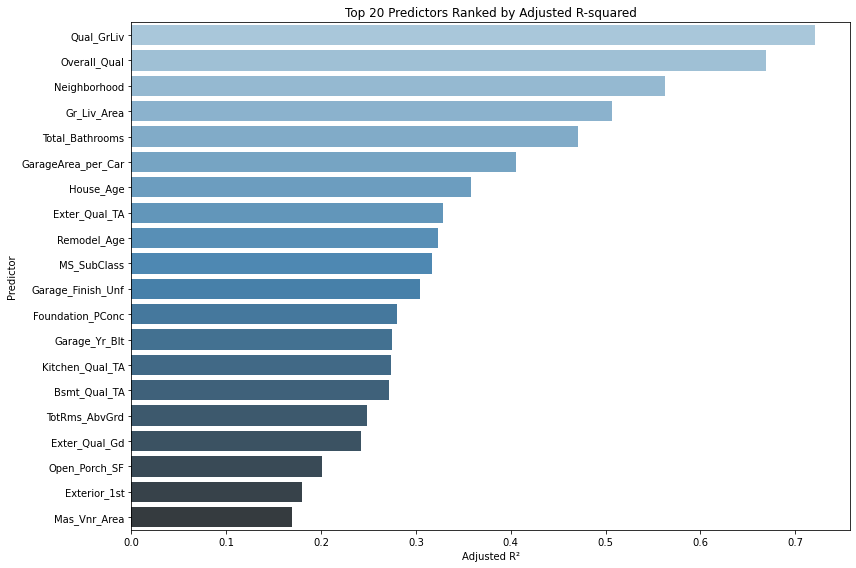

In [27]:
train_data=X_train.join(y_train)
adjusted_r_squared = {}

# Loop through all predictors in the training set
# Some categorical features throw errors because of feature name so used try and except method
for predictor in X_train.columns:
    if predictor != 'SalePrice':  # Skip the target variable
        try:
            formula = f"SalePrice ~ C({predictor})" if train_data[predictor].dtype == 'object' else f"SalePrice ~ {predictor}"
            adjusted_r_squared[predictor] = smf.ols(formula=formula, data=train_data).fit().rsquared_adj  # Fit the model and get adj r2 value.
        except Exception as e:
            continue 

# Sorting predictors 
sorted_predictors = sorted(adjusted_r_squared.items(), key=lambda x: x[1], reverse=True)

# Print the top predictors
print("Top predictors based on Adjusted R-squared:")
for predictor, adj_r2 in sorted_predictors[:20]:
    print(f"{predictor}: {adj_r2:.4f}")
    
adj_r2_df = pd.DataFrame(sorted_predictors, columns=['Feature', 'Adjusted_R2'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Adjusted_R2', y='Feature', data=adj_r2_df.head(20), palette='Blues_d')
plt.title('Top 20 Predictors Ranked by Adjusted R-squared')
plt.xlabel('Adjusted R²')
plt.ylabel('Predictor')
plt.tight_layout()
plt.show()

I am running GridSearchCV on Linear Regression as well, even though it doesn't have many hyperparameters to tune. The reason for this is that I want to retrieve attributes such as the best score, best estimator, and other results, so I can later compare the performance of all models using the same structure.

In [28]:
# Initialize the model
lr_model = LinearRegression()

# Set up parameters for grid search (you can use this as a placeholder for future tuning if needed)
lr_params = {
    'fit_intercept': [True, False],  # This is one hyperparameter we can tune
    'normalize': [True, False]  # For scaling the features before fitting
}

print("Running GridSearchCV for Linear Regression...")
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
lr_grid.fit(X_train, y_train)

# Get best score and parameters
lr_best_score = -lr_grid.best_score_  # Negative because we used 'neg_root_mean_squared_error'
lr_best_params = lr_grid.best_params_
lr_best_estimator = lr_grid.best_estimator_
lr_y_pred = lr_best_estimator.predict(X_test)

print(f"Best RMSE: {lr_best_score:.2f}")
print(f"Best Params: {lr_best_params}")

# Storing the results in the dictionary
results['LinearRegression'] = {
    'best_estimator': lr_best_estimator,
    'metrics': {
        'RMSE': mean_squared_error(y_test, lr_y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, lr_y_pred),
        'R2': r2_score(y_test, lr_y_pred)
    }
}

Running GridSearchCV for Linear Regression...
Best RMSE: 0.15
Best Params: {'fit_intercept': True, 'normalize': False}


C:\Users\shahw\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


### Random Forest Model

In [29]:

rf_model = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

# Define hyperparameters for GridSearchCV
print("Running GridSearchCV for RandomForest...")
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Get best score and parameters
rf_best_score = -rf_grid.best_score_
rf_best_params = rf_grid.best_params_
rf_best_estimator = rf_grid.best_estimator_
rf_y_pred = rf_best_estimator.predict(X_test)

print(f"Best RMSE: {rf_best_score:.2f}")
print(f"Best Params: {rf_best_params}")

# Storing the results in the dictionary
results['RandomForest'] = {
    'best_estimator': rf_best_estimator,
    'metrics':{
        'RMSE': mean_squared_error(y_test, rf_y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, rf_y_pred),
        'R2': r2_score(y_test, rf_y_pred)
}
}

Running GridSearchCV for RandomForest...
Best RMSE: 0.15
Best Params: {'max_depth': None, 'n_estimators': 100}


### AdaBoost Model

In [30]:
ab_model = AdaBoostRegressor(random_state=42)
ab_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1.0],
}

print("Running GridSearchCV for AdaBoost...")
ab_grid = GridSearchCV(ab_model, ab_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
ab_grid.fit(X_train, y_train)

ab_best_score = -ab_grid.best_score_
ab_best_params = ab_grid.best_params_
ab_best_estimator = ab_grid.best_estimator_
ab_y_pred = ab_best_estimator.predict(X_test)

print(f"Best RMSE: {ab_best_score:.2f}")
print(f"Best Params: {ab_best_params}")

results['AdaBoost'] = {
    'best_estimator': ab_best_estimator,
    'metrics':{
    'RMSE': mean_squared_error(y_test, ab_y_pred, squared=False),
    'MAE': mean_absolute_error(y_test, ab_y_pred),
    'R2': r2_score(y_test, ab_y_pred)}
}

Running GridSearchCV for AdaBoost...
Best RMSE: 0.18
Best Params: {'learning_rate': 1.0, 'n_estimators': 50}


### Decision Tree Regressor

In [31]:
dt_model = DecisionTreeRegressor()

# Define hyperparameters for GridSearchCV
dt_params = {
    'max_depth': [5, 10, 20, None],        # Max depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
}

# Run GridSearchCV for Decision Tree
print("Running GridSearchCV for Decision Tree Regressor...")
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Best score and parameters from the GridSearchCV
dt_best_score = -dt_grid.best_score_
dt_best_params = dt_grid.best_params_
dt_best_estimator = dt_grid.best_estimator_
dt_y_pred = dt_best_estimator.predict(X_test)

# Print results
print(f"Best RMSE: {dt_best_score:.2f}")
print(f"Best Params: {dt_best_params}")

# Store results for Decision Tree
results['DecisionTree'] = {
    'best_estimator': dt_best_estimator,
    'metrics': {
        'RMSE': mean_squared_error(y_test, dt_y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, dt_y_pred),
        'R2': r2_score(y_test, dt_y_pred)
    }
}

Running GridSearchCV for Decision Tree Regressor...
Best RMSE: 0.19
Best Params: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


### K-Nearest Neighbors (KNN)

In [32]:

knn_model = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

print("Running GridSearchCV for KNN...")
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn_best_score = -knn_grid.best_score_
knn_best_params = knn_grid.best_params_
knn_best_estimator = knn_grid.best_estimator_
knn_y_pred = knn_best_estimator.predict(X_test)

print(f"Best RMSE: {knn_best_score:.2f}")
print(f"Best Params: {knn_best_params}")

results['KNN'] = {
    'best_estimator':knn_best_estimator,
    'metrics': {
        'RMSE': mean_squared_error(y_test, knn_grid.predict(X_test), squared=False),
        'MAE': mean_absolute_error(y_test, knn_grid.predict(X_test)),
        'R2': r2_score(y_test, knn_grid.predict(X_test))
    }
}

Running GridSearchCV for KNN...
Best RMSE: 0.21
Best Params: {'n_neighbors': 5, 'weights': 'distance'}


### Ridge Regression Model

In [33]:
ridge_model = Ridge()
ridge_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

print("Running GridSearchCV for Ridge...")
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

ridge_best_score = -ridge_grid.best_score_
ridge_best_params = ridge_grid.best_params_
ridge_best_estimator = ridge_grid.best_estimator_
ridge_y_pred = ridge_best_estimator.predict(X_test)

print(f"Best RMSE: {ridge_best_score:.2f}")
print(f"Best Params: {ridge_best_params}")

results['Ridge'] = {
    'best_estimator': ridge_best_estimator,
    'metrics': {
        'RMSE': mean_squared_error(y_test, ridge_grid.predict(X_test), squared=False),
        'MAE': mean_absolute_error(y_test, ridge_grid.predict(X_test)),
        'R2': r2_score(y_test, ridge_grid.predict(X_test))
    }
}

Running GridSearchCV for Ridge...
Best RMSE: 0.13
Best Params: {'alpha': 10.0}


### Lasso Regression Model

In [34]:

lasso_model = Lasso(max_iter=5000)
lasso_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

print("Running GridSearchCV for Lasso...")
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

lasso_best_score = -lasso_grid.best_score_
lasso_best_params = lasso_grid.best_params_
lasso_best_estimator = lasso_grid.best_estimator_
lasso_y_pred = lasso_best_estimator.predict(X_test)

print(f"Best RMSE: {lasso_best_score:.2f}")
print(f"Best Params: {lasso_best_params}")

results['Lasso'] = {
    'best_estimator': lasso_best_estimator,
    'metrics': {
        'RMSE': mean_squared_error(y_test, lasso_grid.predict(X_test), squared=False),
        'MAE': mean_absolute_error(y_test, lasso_grid.predict(X_test)),
        'R2': r2_score(y_test, lasso_grid.predict(X_test))
    }
}

Running GridSearchCV for Lasso...
Best RMSE: 0.13
Best Params: {'alpha': 0.0001}


## 6. Results and Evaluation

### Evaluation Metrics:

- **Root Mean Squared Error (RMSE)**
- **R² Score**
- **Mean Absolute Error**

### Model Performance Summary:
The table below summarizes the performance metrics (RMSE, MAE, and R² Score) for the different models used in the regression analysis:

### Model Performance Table

| Model             | RMSE      | MAE       | R² Score |
|:------------------|:---------|:---------|:--------|
| Linear Regression | 0.1299   | 0.0792    | 0.9089  |
| Random Forest     | 0.1240   | 0.0856    | 0.9169  |
| AdaBoost          | 0.1693   | 0.1333    | 0.8452  |
| Decision Tree     | 0.1660   | 0.1192    | 0.8510  |
| KNN               | 0.2005   | 0.1408    | 0.7827  |
| Ridge             | 0.1126   | 0.0782    | 0.9315  |
| Lasso             | 0.1135   | 0.0776    | 0.9303  |


**Best Model:** Ridge Regression


### Visualizations:

- Actual vs. Predicted plots.
- Residual plots for different metrics.
- Feature importance bar plots.

              Model      RMSE       MAE        R2
0  LinearRegression  0.129857  0.079184  0.908864
1      RandomForest  0.123992  0.085587  0.916911
2          AdaBoost  0.169256  0.133288  0.845172
3      DecisionTree  0.165962  0.119102  0.851140
4               KNN  0.200509  0.140848  0.782715
5             Ridge  0.112555  0.078199  0.931532
6             Lasso  0.113543  0.077604  0.930324


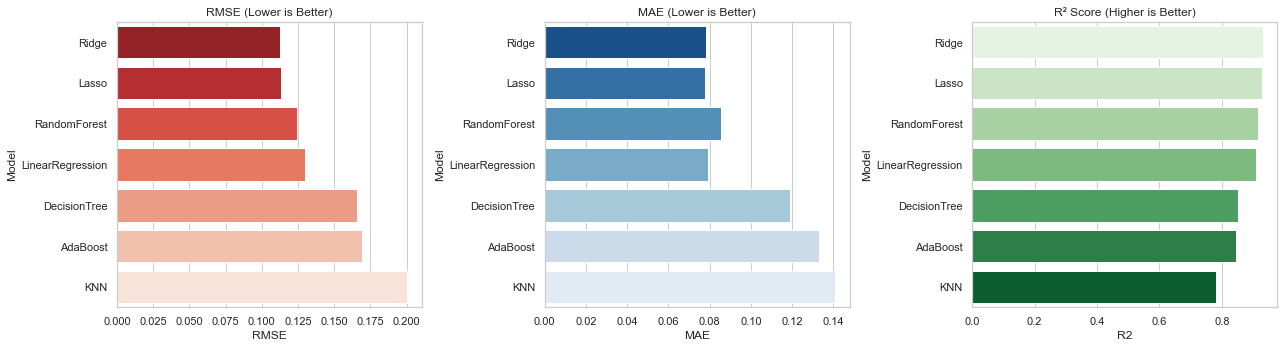

In [35]:
metrics_data = []
for model, result in results.items():
    metrics_data.append({
        'Model': model,
        'RMSE': result['metrics']['RMSE'],
        'MAE': result['metrics']['MAE'],
        'R2': result['metrics']['R2']
    })

metrics_df = pd.DataFrame(metrics_data)

print(metrics_df)

# Sort by RMSE for better comparison
metrics_df = metrics_df.sort_values(by='RMSE')

# Plot barplot comparing different metric values of the models
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='RMSE', y='Model', data=metrics_df, ax=axes[0], palette='Reds_r')# RMSE Plot
axes[0].set_title('RMSE (Lower is Better)')
sns.barplot(x='MAE', y='Model', data=metrics_df, ax=axes[1], palette='Blues_r')# MAE Plot
axes[1].set_title('MAE (Lower is Better)')
sns.barplot(x='R2', y='Model', data=metrics_df, ax=axes[2], palette='Greens')# R² Plot
axes[2].set_title('R² Score (Higher is Better)')
plt.tight_layout()
plt.show()

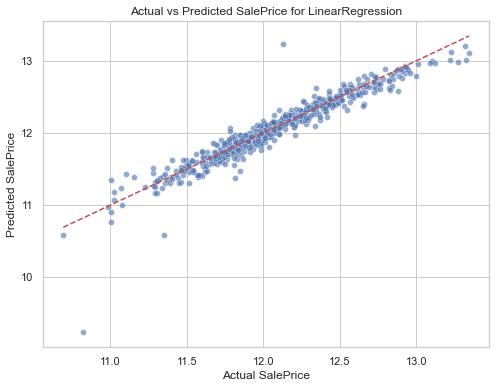

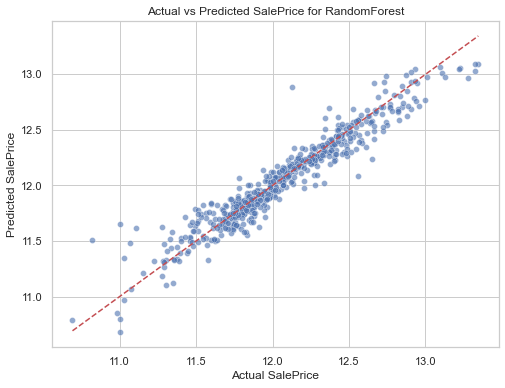

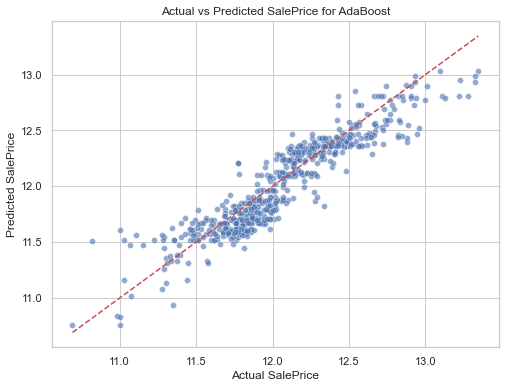

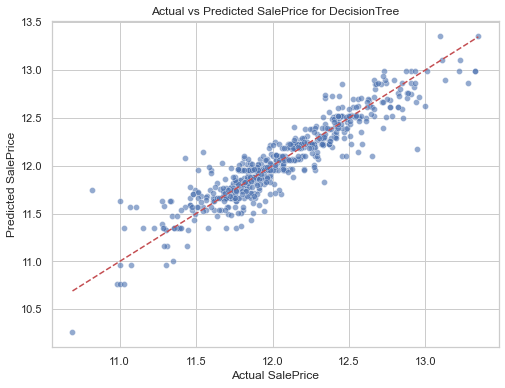

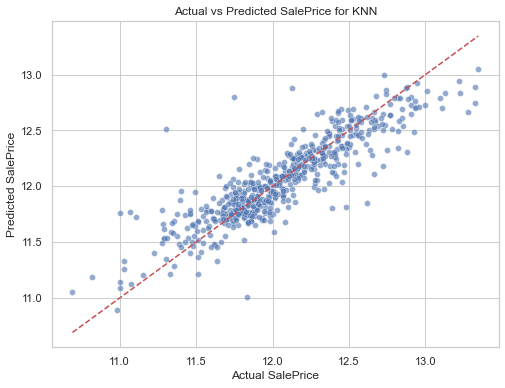

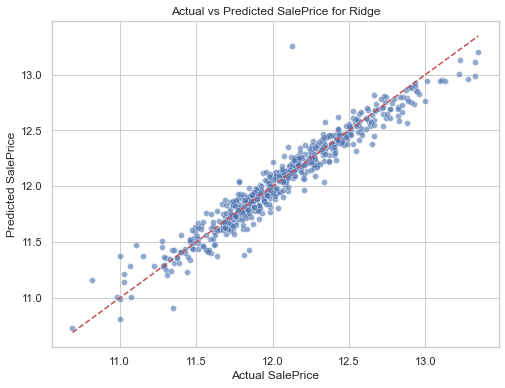

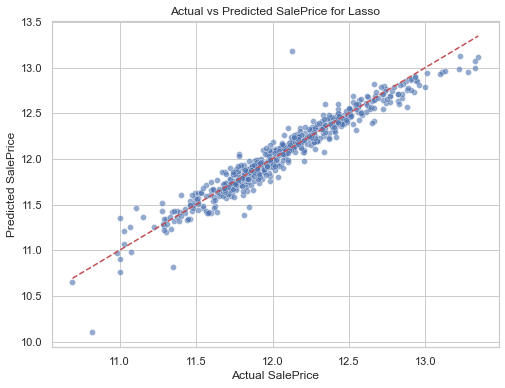

In [36]:
# Visualize Actual vs Predicted SalePrice for each model

for model, result in results.items():
    best_model = result['best_estimator']  # Access the best estimator from the result dictionary
    y_pred = best_model.predict(X_test)
    
    # Scatter plot for Actual vs Predicted
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line
    plt.xlabel('Actual SalePrice')
    plt.ylabel('Predicted SalePrice')
    plt.title(f'Actual vs Predicted SalePrice for {model}')
    plt.show()

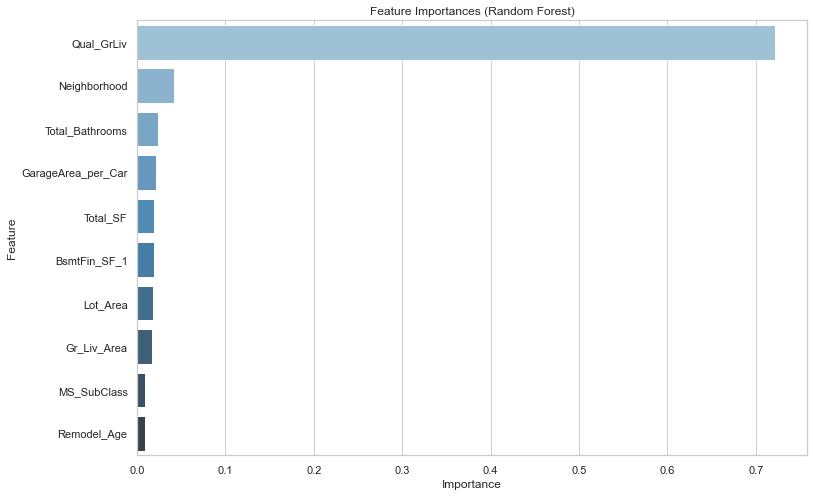

In [37]:
# Barplot for Random Forest Feature Importance
rf_model = results['RandomForest']['best_estimator']

# Get feature importances
importances = rf_model.feature_importances_

# Get feature names from X_train (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame for features and their importance
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='Blues_d')
plt.title('Feature Importances (Random Forest)')
plt.show()

### Analysis

- **Random Forest**: The best performing model with the lowest RMSE (0.1240) and the highest R² (0.9169). It excels in capturing non-linear relationships and generalizes well due to its ensemble nature, making it robust to overfitting.
  
- **AdaBoost**: Performs closely to Random Forest but slightly worse with RMSE = 0.1693 and R² = 0.8452. Although AdaBoost corrects errors from weak models, it is more sensitive to noisy data, limiting its performance.

- **Decision Tree**: Struggles with overfitting, resulting in high RMSE (0.1660) and lower R² (0.8510). It captures noise in the data and lacks generalization, which hampers its overall performance.

- **KNN**: Shows moderate performance with RMSE = 0.2005, struggling with large datasets and non-linear relationships, making it less effective than ensemble models like Random Forest.

- **Ridge & Lasso**: Both regularized models have similar performance, with RMSEs of 0.1126 and 0.1135, and R² values of 0.9315 and 0.9303, respectively. They effectively reduce overfitting but fail to capture complex relationships compared to Random Forest.

- **Linear Regression**: Serves as a baseline with RMSE = 0.1299 and R² = 0.9089. It is outperformed by regularized and ensemble models, especially in capturing non-linear relationships.

### Conclusion

- **Best Models**: Random Forest and AdaBoost are the best performers, with Random Forest slightly ahead due to its ability to handle non-linearities and avoid overfitting.
- **Poor Performance**: Decision Tree performs poorly due to overfitting, while KNN, Ridge, and Lasso show decent but not outstanding performance.
- **Baseline**: Linear Regression is a solid baseline but is outperformed by more complex models, especially when dealing with non-linear data.

## 7. Discussion and Conclusion

In this project, we aimed to predict the sale prices of houses using the Ames Housing dataset through supervised learning techniques.

**Learning and Takeaways:**  
A critical takeaway from the project was the importance of thoughtful feature engineering, careful data preprocessing, and model selection in achieving good predictive performance. Through Exploratory Data Analysis (EDA), features such as OverallQual, GrLivArea, and GarageCars were identified as major contributors to SalePrice, confirmed through correlation analysis and visualizations. This reinforced the value of domain understanding combined with statistical insights.

**Why Something Didn’t Work / Challenges:**  
Some challenges encountered during the project included handling missing values appropriately, addressing multicollinearity between features (e.g., GarageArea and GarageCars), and selecting the right level of model complexity to balance bias and variance. Additionally, initial models without hyperparameter tuning performed worse, highlighting the importance of systematically optimizing model parameters rather than relying on defaults.

We experimented with three regression models — **Linear Regression**, **Ridge Regression**, and **Lasso Regression**. Regularization methods, particularly Ridge Regression with tuned hyperparameters, significantly improved model performance by reducing overfitting and stabilizing predictions. Ridge Regression ultimately achieved the lowest RMSE and the highest R² score among the models tested, demonstrating the effectiveness of regularization for tabular data with correlated features.

**Suggestions for Improvement / Future Work:**  
If this project were to be extended, several improvements could be made. Future work could explore **ensemble methods** like Gradient Boosting, or XGBoost to potentially capture non-linear relationships better. A more extensive hyperparameter search using techniques like **RandomizedSearchCV** could further optimize model performance. Additionally, experimenting with feature scaling, interaction terms, or polynomial features might help capture more complex relationships within the data.

Overall, this project strengthened key machine learning skills including data cleaning, EDA, feature selection, regularization techniques, model evaluation using multiple metrics (RMSE, MAE, R²), and interpretation of model results. It highlighted the critical role of iterative experimentation, systematic optimization, and thoughtful model selection in building effective machine learning solutions for real-world datasets.